In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

In [2]:
train = pd.read_json("train.json")

In [3]:
train["num_photos"] = train["photos"].apply(len)
train["num_features"] = train["features"].apply(len)
train["num_description_words"] = train["description"].apply(lambda x: len(x.split(" ")))
train["created"] = pd.to_datetime(train["created"])
train["created_year"] = train["created"].dt.year
train["created_month"] = train["created"].dt.month
train["created_day"] = train["created"].dt.day

In [4]:
train.head(3)

,bathrooms,bedrooms,building_id,created,description,display_address,features,interest_level,latitude,listing_id,...,manager_id,photos,price,street_address,num_photos,num_features,num_description_words,created_year,created_month,created_day
10,1.5,3,53a5b119ba8f7b61d4e010512e0dfc85,2016-06-24 07:54:24,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...,Metropolitan Avenue,[],medium,40.7145,7211212,...,5ba989232d0489da1b5f2c45f6688adc,[https://photos.renthop.com/2/7211212_1ed4542e...,3000,792 Metropolitan Avenue,5,0,95,2016,6,24
10000,1.0,2,c5c8a357cba207596b04d1afd1e4f130,2016-06-12 12:19:27,,Columbus Avenue,"[Doorman, Elevator, Fitness Center, Cats Allow...",low,40.7947,7150865,...,7533621a882f71e25173b27e3139d83d,[https://photos.renthop.com/2/7150865_be3306c5...,5465,808 Columbus Avenue,11,5,9,2016,6,12
100004,1.0,1,c3ba40552e2120b0acfc3cb5730bb2aa,2016-04-17 03:26:41,"Top Top West Village location, beautiful Pre-w...",W 13 Street,"[Laundry In Building, Dishwasher, Hardwood Flo...",high,40.7388,6887163,...,d9039c43983f6e564b1482b273bd7b01,[https://photos.renthop.com/2/6887163_de85c427...,2850,241 W 13 Street,8,4,94,2016,4,17


In [5]:
num_feats = ["bathrooms", "bedrooms", "latitude", "longitude", "price",
             "num_photos", "num_features", "num_description_words",
             "created_year", "created_month", "created_day"]

In [6]:
X_df = train[num_feats]
X_mat = X_df.as_matrix()
X_mat.shape

(49352, 11)

In [7]:
Y_df = pd.DataFrame(train.loc[:,'interest_level'])
Y_df['interest'] = [0 if x=='low' else(1 if x=='medium' else(2)) for x in Y_df.interest_level]
Y_mat = Y_df.interest.as_matrix()
Y_mat.shape

(49352,)

### Trees, Random Forest Analysis (Andrew)

In [8]:
from sklearn import tree
tree_model = tree.DecisionTreeClassifier()

In [9]:
tree_model.get_params

<bound method DecisionTreeClassifier.get_params of DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')>

In [10]:
tree_model.fit(X_mat, Y_mat)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [11]:
tree_model.score(X_mat, Y_mat)

0.99854109255957202

In [12]:
from sklearn import ensemble
from sklearn.metrics import log_loss
rf_model = ensemble.RandomForestClassifier(n_estimators = 100, n_jobs = 3)

In [13]:
rf_model.fit(X_mat, Y_mat)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=3, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

### Train Test Split

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_mat, Y_mat, test_size=0.33)

In [15]:
rf_model.get_params

<bound method RandomForestClassifier.get_params of RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=3, oob_score=False, random_state=None,
            verbose=0, warm_start=False)>

In [16]:
rf_model.score(X_mat, Y_mat)

0.99852082995623281

In [17]:
y_val_pred = rf_model.predict_proba(X_val)

In [18]:
log_loss(y_val, y_val_pred)

0.15356373393883957

### Kaggle RF Starter Adaptation

In [19]:
clf = ensemble.RandomForestClassifier(n_estimators=200, n_jobs=3)
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=200, n_jobs=3, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [20]:
clf.score

<bound method RandomForestClassifier.score of RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=200, n_jobs=3, oob_score=False, random_state=None,
            verbose=0, warm_start=False)>

In [21]:
y_val_pred = clf.predict_proba(X_val)
log_loss(y_val, y_val_pred)

0.63761667520345133

#### Search for optimal # of trees

In [45]:
LL_tree = []
for x in range(40, 61, 1):
    if x % 5 == 0:
        print("Checking model with %d ests") % (x)
    clf = ensemble.RandomForestClassifier(n_estimators=x, n_jobs=3, oob_score=True)
    clf.fit(X_train, y_train)
    y_val_pred = clf.predict_proba(X_val)
    ll = log_loss(y_val, y_val_pred)
    LL_tree.append((x, ll))
    

Checking model with 40 ests
Checking model with 41 ests
Checking model with 42 ests
Checking model with 43 ests
Checking model with 44 ests
Checking model with 45 ests
Checking model with 46 ests
Checking model with 47 ests
Checking model with 48 ests
Checking model with 49 ests
Checking model with 50 ests
Checking model with 51 ests
Checking model with 52 ests
Checking model with 53 ests
Checking model with 54 ests
Checking model with 55 ests
Checking model with 56 ests
Checking model with 57 ests
Checking model with 58 ests
Checking model with 59 ests


In [46]:
import matplotlib.pyplot as plt
%matplotlib inline

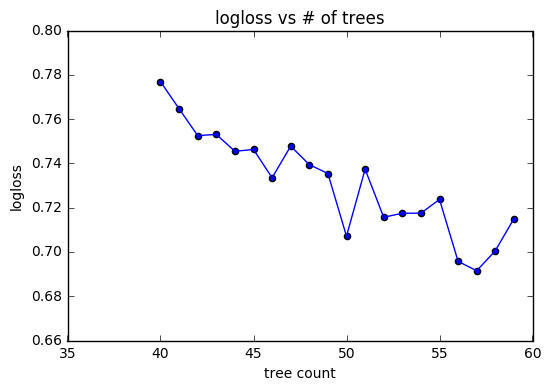

In [49]:
tree = []
logloss = []
for x in LL_tree:
    tree.append(x[0])
    logloss.append(x[1])

plt.scatter(tree, logloss)
plt.plot(tree, logloss)
plt.ylabel('logloss')
plt.xlabel('tree count')
plt.title('logloss vs # of trees')
plt.show()

#### Adapt Predictions

In [58]:
test = pd.read_json(open("test.json", "r"))
print(test.shape)

testclf = ensemble.RandomForestClassifier(n_estimators=57, n_jobs=3, oob_score=True)
testclf.fit(X_train, y_train)

(74659, 14)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=57, n_jobs=3, oob_score=True, random_state=None,
            verbose=0, warm_start=False)

In [59]:
test["num_photos"] = test["photos"].apply(len)
test["num_features"] = test["features"].apply(len)
test["num_description_words"] = test["description"].apply(lambda x: len(x.split(" ")))
test["created"] = pd.to_datetime(test["created"])
test["created_year"] = test["created"].dt.year
test["created_month"] = test["created"].dt.month
test["created_day"] = test["created"].dt.day
X = test[num_feats]
y = testclf.predict_proba(X)


In [60]:
#labels2idx = {label: i for i, label in enumerate(clf.classes_)}
labels2idx = {'high': 0, 'low': 1, 'medium': 2}
labels2idx

{'high': 0, 'low': 1, 'medium': 2}

In [61]:
sub = pd.DataFrame()
sub["listing_id"] = test["listing_id"]
for label in ["high", "medium", "low"]:
    sub[label] = y[:, labels2idx[label]]
sub.to_csv("submission_rf.csv", index=False)